<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1">Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2">Исследование задачи</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.0.0.1">Вывод</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3">Борьба с дисбалансом</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.0.0.1">Вывод</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4">Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5">Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

`Суть проекта` - Даны данные банка "Бета - Банк" по клиентам. Клиенты начали покидать немного но ежемесячно банк. Нужно построить модель с предельно большим значением F1-меры.

`Конечная цель проекта` - Выбрать наиболее точную модель и довести её F1-меру до уровня выше 0.59.

Начнем с импортирования всех нужных библиотек:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve 
from tqdm.auto import tqdm

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import warnings
from pandas.core.common import SettingWithCopyWarning

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data = data.fillna(0)
display(data)
print(data.info())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


Надо определить какие столбцы будут являться признаками, а какие будет являться целевым признаком:

Признаками являются столбцы `RowNumber - EstimatedSalary` а а вот целевым признаком будет являться `Exited`

In [3]:
data_ohe = pd.get_dummies(data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1), drop_first=True)
features = data_ohe.drop(['Exited'], axis = 1)
target = data_ohe['Exited']
features_train, features_valid, target_train, target_valid = train_test_split(features, target, stratify=target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, stratify=target_valid, test_size=0.5, random_state=12345)


Было применено одноразовое кодирование на датафрейме с отбрасыванием трёх столбцов а так же были созданы переменные под признаки и целевые признаки

In [4]:
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()

scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])

scaler.fit(features_valid[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

scaler.fit(features_test[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [5]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


Было проведено стандартизирование признаков с разным масштабом с помощью `Scaler`

## Исследование задачи

Для начала посмотрим баланс классов:

In [6]:
target.mean()

0.2037

Дисбаланс классов как итог получился высоким, в размере почти 20%:80%

Создадим модель случайного леса:

In [7]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in tqdm(range(1, 51, 5)):
    for depth in range(1, 16):
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model_forest = model
            best_result = result
            best_est = est
            best_depth = depth
print("F1 наилучшей модели случайного леса:", round(best_result, 3),
      "Количество деревьев:", best_est, "Максимальная глубина:", best_depth)

  0%|          | 0/10 [00:00<?, ?it/s]

F1 наилучшей модели случайного леса: 0.616 Количество деревьев: 46 Максимальная глубина: 14


In [8]:
best_depth = 0    
best_model = None
best_result_tree = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model.fit(features_train, target_train) 
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid) 
    if result > best_result_tree:
        best_model = model
        best_result_tree = result
        best_depth = depth
print("F1 наилучшей модели Дерева решений:", best_result_tree, "Максимальная глубина:", best_depth)

F1 наилучшей модели Дерева решений: 0.5950653120464441 Максимальная глубина: 7


In [9]:
model_logistic = LogisticRegression(solver='liblinear', random_state=12345)
model_logistic.fit(features_train, target_train) 
predictions = model_logistic.predict(features_valid) 
result_logistic = f1_score(target_valid, predictions) 

print("F1 модели логистической регрессии:", result_logistic)

F1 модели логистической регрессии: 0.3076923076923077


##### Вывод

По итогу получилось достичь F1 меру в размере 0.616 у модели Случайного леса и в 0.595 у модели Дерева решений.
При этом лучше всего модель случайного леса показывает все при гиперпараметрах: est = 46, max_depth = 14.

Так же присутствует дисбаланс классов 20%:80%

## Борьба с дисбалансом

Для борбы с дисбалансом потребуется провести увеличение и уменьшение выборки при использовании модели случайного леса, как самой эффективной модели.

Начнем с увеличения выборки:

In [10]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
print('Дисбаланс:', target_upsampled.mean())

Дисбаланс: 0.5056900475894889


In [11]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in tqdm(range(1, 51, 5)):
    for depth in range(1, 16):
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model_forest = model
            best_result = result
            best_est = est
            best_depth = depth
print("F1 наилучшей модели случайного леса:", round(best_result, 3),
      "Количество деревьев:", best_est, "Максимальная глубина:", best_depth)

  0%|          | 0/10 [00:00<?, ?it/s]

F1 наилучшей модели случайного леса: 0.644 Количество деревьев: 36 Максимальная глубина: 9


Для увеличения выборки была разделена обучающая выборка на отрицательные и положительные объекты, скопированы несколько раз положительные объекты, созданы новая обучающая выборка и перемешены данные. 

В результате увеличения выборки, f1 наилучшей модели случайного леса стала равна 0.644 (было 0,616)

Проведу исследование на остальных моделях:

In [12]:
best_depth = 0    
best_model = None
best_result_tree = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result_tree:
        best_model = model
        best_result_tree = result
        best_depth = depth
print("F1 наилучшей модели Дерева решений:", best_result_tree, "Максимальная глубина:", best_depth)

F1 наилучшей модели Дерева решений: 0.5769944341372912 Максимальная глубина: 6


In [13]:
model_logistic = LogisticRegression(solver='liblinear', random_state=12345)
model_logistic.fit(features_upsampled, target_upsampled) 
predictions = model_logistic.predict(features_valid) 
result_logistic = f1_score(target_valid, predictions) 

print("F1 модели логистической регрессии:", result_logistic)

F1 модели логистической регрессии: 0.5233160621761659


В конечном результате `дерево решений` после увеличения выборки показало F1 наилучшей модели более худший, чем был `0.576 в сравнении с 0.595`,
Однако F1 модели `логистической регрессии`, после увеличения выборки, наоборот показало улучшение, а именно `0.523(в сравнении с 0.307)`.

Ниже проведем уменьшение выборки:

In [14]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
print('Дисбаланс:', target_downsampled.mean())

Дисбаланс: 0.5057947019867549


Для уменьшении выборки была разделена обучающая выборка на отрицательные и положительные объекты, затем случайным образом была отброшена часть из отрицательных объектов, а затем, с учетом полученных данных была создана новая обучающая выборка, в конце было проведено перемешивание данных чтобы положительные данные не шли следом за отрицательными.

Проверим теперь модели случайного леса, дерева решений и логистической регрессии:

In [15]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in tqdm(range(1, 51, 5)):
    for depth in range(1, 16):
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
        model.fit(features_downsampled, target_downsampled)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model_forest = model
            best_result = result
            best_est = est
            best_depth = depth
print("F1 наилучшей модели случайного леса:", round(best_result, 3),
      "Количество деревьев:", best_est, "Максимальная глубина:", best_depth)

  0%|          | 0/10 [00:00<?, ?it/s]

F1 наилучшей модели случайного леса: 0.634 Количество деревьев: 41 Максимальная глубина: 6


В результате уменьшения выборки, f1 наилучшей модели `случайного леса` стала равна `0.634` (было 0,616 без изменений выборок и 0.644 в случае увеличения выборки), что говорит о том, что увеличение выборки в данном случае гораздо лучше влияет на улучшение качества модели, нежели уменьшение выборки.

Проверим остальные две модели:

In [16]:
best_depth = 0    
best_model = None
best_result_tree = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result_tree:
        best_model = model
        best_result_tree = result
        best_depth = depth
print("F1 наилучшей модели Дерева решений регрессии:", best_result_tree, "Максимальная глубина:", best_depth)

F1 наилучшей модели Дерева решений регрессии: 0.5928030303030303 Максимальная глубина: 6


В результате уменьшения выборки, f1 наилучшей модели `Дерева решений` стала равна 0.592 (было 0,595 без изменений выборок и 0.576 в случае увеличения выборки), что говорит о том, что уменьшение выборки в данном незначительно сильнее влияет на улучшение качества модели, нежели увеличение выборки.

In [17]:
model_logistic = LogisticRegression(solver='liblinear', random_state=12345)
model_logistic.fit(features_downsampled, target_downsampled) 
predictions = model_logistic.predict(features_valid) 
result_logistic = f1_score(target_valid, predictions) 

print("F1 модели логистической регрессии:", result_logistic)

F1 модели логистической регрессии: 0.526225279449699


В результате уменьшения выборки, f1 наилучшей модели `Логистической регрессии` стала равна 0.526 (было 0.307 без изменений выборок и 0.523 в случае увеличения выборки), что говорит о том, что уменьшение выборки в данном случае незначительно лучше влияет на улучшение качества модели, нежели увеличение выборки.

##### Вывод

В результате борьбы с дисбалансом и уменьшения/увеличения выборки, было выявлено, что лучше всего себя в обоих случаях показывает модель Случайного леса, при этом именно увеличение выборки в данном случае наиболее эффективно. 

В случае с моделью дерева решений и логистической регрессии, можно сделать вывод что на них лучше влияет уменьшение выборки, однако эти изменения и разницы незначительны.

В результате чего наиболее подходящей системой является модель Случайного леса на валидационной выборке при увеличенной выборке.

## Тестирование модели

Тестирование будет проводиться на модели случайного леса так же при увеличении и уменьшении выборки.

Сначала проведем при увеличении выборки:

In [18]:
features_upsampled, target_upsampled = upsample(pd.concat([features_train, features_valid]), pd.concat([target_train, target_valid]), 4)
print('Дисбаланс:', target_upsampled.mean())

Дисбаланс: 0.5058184639255237


In [19]:
model = RandomForestClassifier(n_estimators=36, max_depth=9, random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
print(f1_score(target_test, predicted_test))

0.5985247629083246


F1 модели случайного леса на тестовой выборке неплохая

In [20]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)

0.8531081158199801


Площадь под ROC-кривой показывает неплохой результат

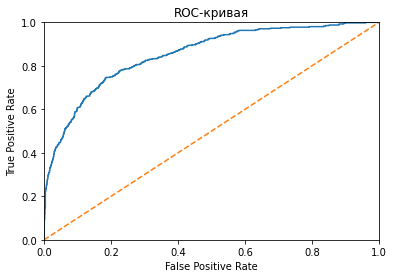

In [21]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.plot([0, 1], [0, 1], linestyle='--')

По графику видну, что качество модели достаточно высыше над случайной моделью

Теперь проведем тестирование над уменьшенной выборкой:

In [22]:
features_downsampled, target_downsampled = downsample(pd.concat([features_train, features_valid]), pd.concat([target_train, target_valid]), 0.25)
print('Дисбаланс:', target_downsampled.mean())

model = RandomForestClassifier(n_estimators=41, max_depth=6, random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)
print(f1_score(target_test, predicted_test))

Дисбаланс: 0.5058969584109249
0.5762711864406781


F1 модели случайного лега в данном случае куда хуже, чем в случае с увеличенной выборкой на тестовоый выборке.

In [23]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)

0.8538353453607691


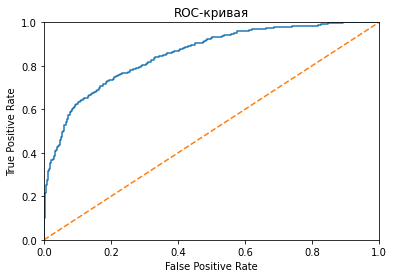

In [24]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.plot([0, 1], [0, 1], linestyle='--')

Наша модель так же сильно отличается от случайной модели как и в случае с увеличением выборки.

# Финальный вывод

Проведя исследование 3-ех различных моделей и в результате борьбы с дисбалансом в выборках, пришли в итоге к тому, что:
- Изначально дисбаланс классов был в размере 20%:80%, однако при борьбе с ним получилось приблизиться к 1:1 
- В случае неисправленного дисбаланса, в случае увеличенной выборки а так же в случае уменьшенной выборки, во всех трёх случаях по F1 лучше всего себя показала модель Случайного леса (F1 = 0.616, 0.644, 0.634 соответственно)
- На тестовой выборке лучший результат получился при увеличении выборки F1 = 0.598
- Так же по графику ROC-кривой видно, что наша модель сильно отличается от случайной


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*